<a href="https://colab.research.google.com/github/darthfelipe21/Data_Scientist/blob/main/notebook_electric_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELECTRIC BIKES DATACAMP

![Electric_bikes_Datacamp](Electric_bikes_Datacamp.jpg)

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, Normalizer, normalize, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, roc_auc_score, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Import Data and create Dataframe
df= pd.read_csv('electric_bike_ratings_2212.csv')

In [ ]:
# Print firsts rows and shape of the dataframe
print(df.head())
print(df.shape)

   owned     make_model  ... value_for_money overall_rating
0      1   Nielah-Eyden  ...            5/10          18.62
1      0  Nielah-Keetra  ...            4/10          15.55
2      0   Lunna-Keetra  ...            5/10          12.76
3      1   Hoang-Keetra  ...            5/10          17.07
4      1   Lunna-Keetra  ...            5/10          12.29

[5 rows x 8 columns]
(1500, 8)


In [ ]:
# Transform columns review_month to date type
df['month_of_review'] = df['review_month'].apply(lambda months: months.split('-')[1] if '-' in months else months)
df= df.drop('review_month', axis=1)
df['month_of_review'] = pd.to_datetime(df['month_of_review'], format='%b', errors='coerce').dt.to_period('M').dt.strftime('%b')
print(df)

      owned     make_model  ... overall_rating month_of_review
0         1   Nielah-Eyden  ...          18.62             Oct
1         0  Nielah-Keetra  ...          15.55             Jun
2         0   Lunna-Keetra  ...          12.76             Oct
3         1   Hoang-Keetra  ...          17.07             Nov
4         1   Lunna-Keetra  ...          12.29             Sep
...     ...            ...  ...            ...             ...
1495      1   Nielah-Eyden  ...          18.76             May
1496      1   Nielah-Eyden  ...          18.56             Mar
1497      1   Nielah-Eyden  ...          20.22             Nov
1498      0   Nielah-Eyden  ...          18.51             Nov
1499      1    Hoang-Eyden  ...          20.47             Jul

[1500 rows x 8 columns]


In [ ]:
# Print all nulls
df.isnull().sum()

owned                0
make_model           0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
month_of_review      0
dtype: int64

In [ ]:
# Fill null values with "unkown"
df['web_browser'].fillna('unknown', inplace=True)

In [ ]:
df.reviewer_age.sort_values().value_counts()

-     105
19     52
41     51
45     50
44     46
18     46
20     46
17     45
37     45
39     45
30     45
40     45
16     43
23     43
48     42
46     41
21     41
22     40
36     39
33     39
26     39
24     39
27     38
25     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
32     30
38     28
49     26
Name: reviewer_age, dtype: int64

In [ ]:
# Change the values no numeric from 'reviewer_age' to 'mean_age'
mean_age= []

df['reviewer_age']= df['reviewer_age'].replace('-', 0).astype(int)

for _, n in df['reviewer_age'].items():
  if  n != 0 :
    mean_age.append(n)

mean_age= np.mean(mean_age).astype(int)

df['reviewer_age']= df['reviewer_age'].replace(0, mean_age).astype(int)

df.reviewer_age.sort_values().value_counts()

32    135
19     52
41     51
45     50
18     46
20     46
44     46
37     45
17     45
39     45
30     45
40     45
16     43
23     43
48     42
21     41
46     41
22     40
36     39
33     39
26     39
24     39
27     38
25     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
38     28
49     26
Name: reviewer_age, dtype: int64

In [ ]:
# Normalize column 'value_for_money'
df['cost-effectiveness'] = df['value_for_money'].apply(lambda score: score.split('/')[0] if '/' in score else score)
df= df.drop('value_for_money', axis=1)
df['cost-effectiveness']= df['cost-effectiveness'].astype(int)
df['cost-effectiveness'].value_counts()

5     387
6     323
4     315
3     183
7     167
2      53
8      52
1      11
9       8
10      1
Name: cost-effectiveness, dtype: int64

In [ ]:
# Checking that all values are as description
for col in df:
  print('Column name:', col)
  print('Count of values:','\n', df[col].value_counts(),'\n')

Column name: owned
Count of values: 
 1    890
0    610
Name: owned, dtype: int64 

Column name: make_model
Count of values: 
 Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64 

Column name: web_browser
Count of values: 
 Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64 

Column name: reviewer_age
Count of values: 
 32    135
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
16     43
23     43
48     42
21     41
46     41
22     40
36     39
33     39
24     39
26     39
25     38
27     38
42     37
47     37
43     36
28     36
31     36
29     35
50     33
34     32
35     31
38     28
49     26
Name: reviewer_age, dtype: int64 

Column name: primary_use
Count of values: 
 Commuting    1095
Leisure       405
Name: primary_use, dt

In [ ]:
# Checking info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owned               1500 non-null   int64  
 1   make_model          1500 non-null   object 
 2   web_browser         1500 non-null   object 
 3   reviewer_age        1500 non-null   int64  
 4   primary_use         1500 non-null   object 
 5   overall_rating      1500 non-null   float64
 6   month_of_review     1500 non-null   object 
 7   cost-effectiveness  1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


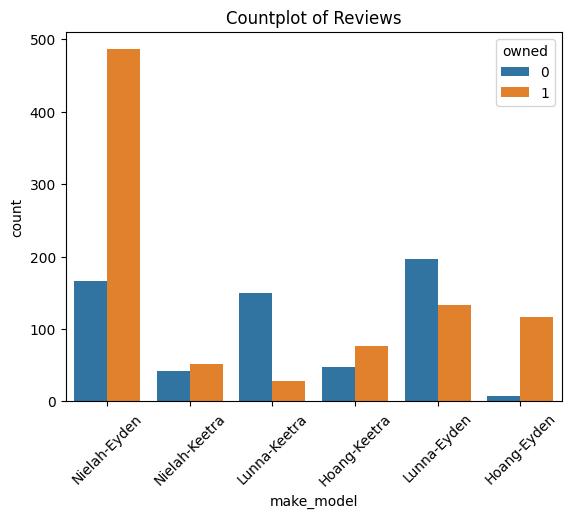

In [ ]:
# Make a count plot to show reviews from owners and not owners
sns.countplot(hue=df.owned, x=df.make_model).set_title('Countplot of Reviews')
plt.xticks(rotation=45)
plt.show()

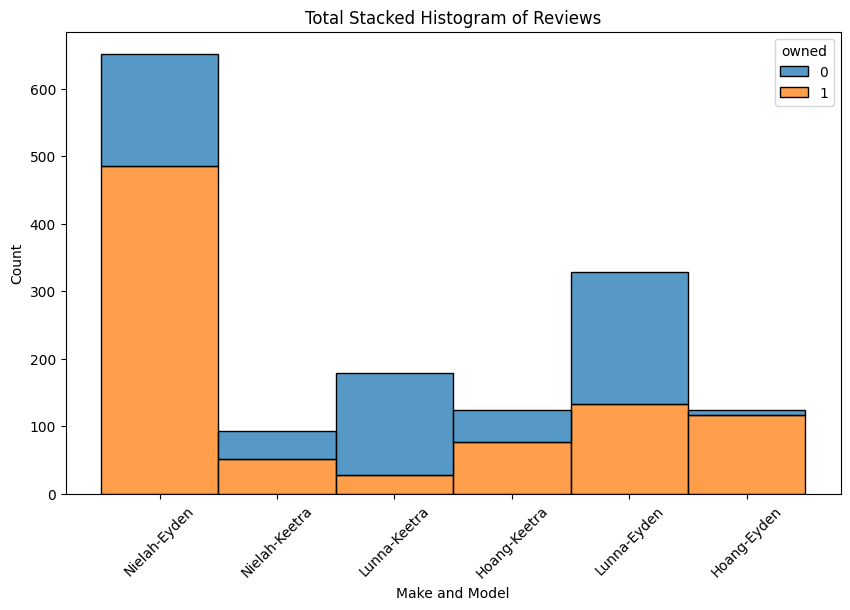

In [ ]:
# Calculate total votes per model
total_votes = df.groupby('make_model').size().reset_index(name='total_votes')

# Create the stacked histplot plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='make_model', hue='owned', multiple='stack')
plt.title('Total Stacked Histogram of Reviews')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As can be seen in the graph, in at least 4 out of the 6 models, there is a higher number of reviews from owners than from non-owners, especially in the 'Nielah-Eyden' model, where at least two-thirds of the reviews come directly from owners.

We can conclude, for now:

1. The 'Lunna-Keetra' and 'Lunna-Eyden' models have more reviews from non-owners, while the 'Nielah-Eyden', 'Nielah-Keetra', 'Hoang-Keetra', and 'Hoang-Eyden' models have more reviews from owners.
2. The 'Nielah-Eyden' model has the highest overall number of reviews.
3. Due to the fact that the opinions of the owners are higher in 4 of the 6 models, the distribution tends to be unbalanced, less so for the 'Nielah-Keetra' model.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owned               1500 non-null   int64  
 1   make_model          1500 non-null   object 
 2   web_browser         1500 non-null   object 
 3   reviewer_age        1500 non-null   int64  
 4   primary_use         1500 non-null   object 
 5   overall_rating      1500 non-null   float64
 6   month_of_review     1500 non-null   object 
 7   cost-effectiveness  1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


## Data Visualization

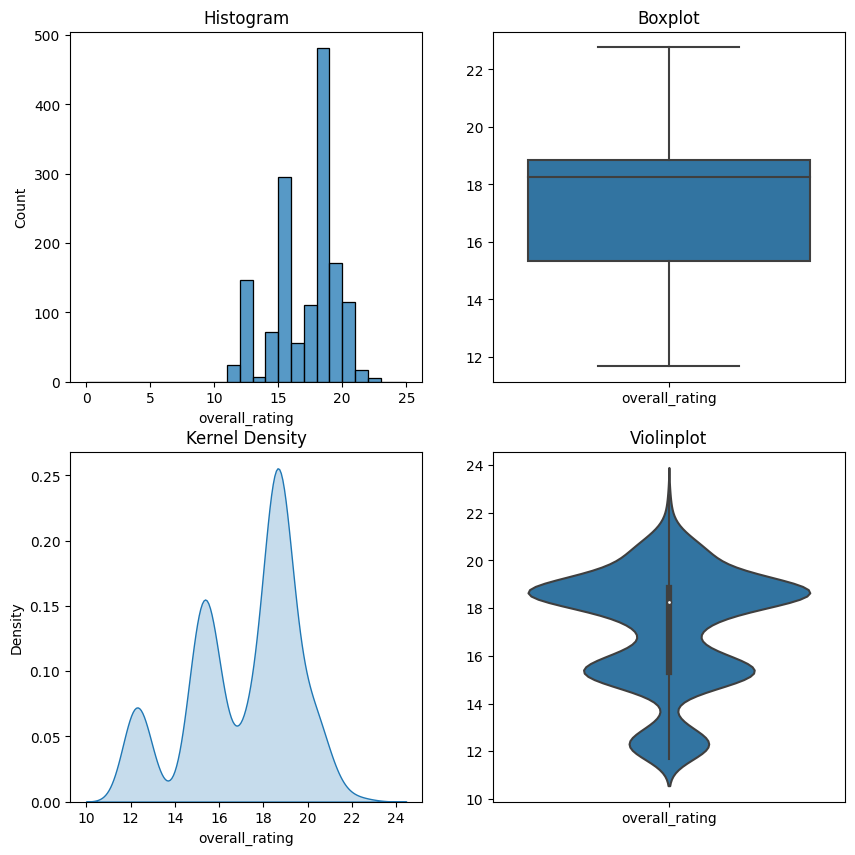

In [ ]:
# Plot Overall Rating Distribution
fig, ((ax0, ax1), (ax2, ax3))= plt.subplots(nrows= 2 , ncols=2, figsize=(10,10), gridspec_kw={'hspace': 0.2}, sharey= False)

# Making a Histogram and a Boxplot
sns.histplot(df['overall_rating'], ax= ax0, bins=range(0,26)).set_title('Histogram')
sns.boxplot(df['overall_rating'], ax= ax1).set_title('Boxplot')
sns.kdeplot(df['overall_rating'], ax=ax2, shade=True).set_title('Kernel Density')
sns.violinplot(df['overall_rating'], ax=ax3).set_title('Violinplot')

# Parameter for the axis
ax1.set_xticklabels(['overall_rating'])
ax3.set_xticklabels(['overall_rating'])


plt.tight_layout()
plt.show()

**As seen in the four plots (histogram, boxplot, kernel density, and violinplot), the distribution of the scores is centered around the mean value, which is approximately between 18 and 19 points.**

In [ ]:
# Compute de median and the mean of overall_rating
print('Median of rating: ', np.median(df['overall_rating']))
print('Mean of rating: ', round(np.mean(df['overall_rating']), 2))

Median of rating:  18.24
Mean of rating:  17.14


Based on the graphs, there seems to be a distribution with a left skew, and as we can observe in the calculations of mean and median, the mean tends to be slightly lower than the median.

To certify or corroborate this information, we will evaluate the coefficients of Pearson and Fisher skewness.

In [ ]:
# Calculate the Pearson asymmetry coefficient
coef_pearson = stats.skew(df['overall_rating'])

# Print Results
print("Pearson asymmetry coefficient:", coef_pearson)

Pearson asymmetry coefficient: -0.5901576982135008


With this calculation, we can conclude that since the Pearson skewness coefficient is -0.5901576982135008, there is indeed a negative skew in the distribution of the data. This is consistent with the interpretation of the previous graphs.

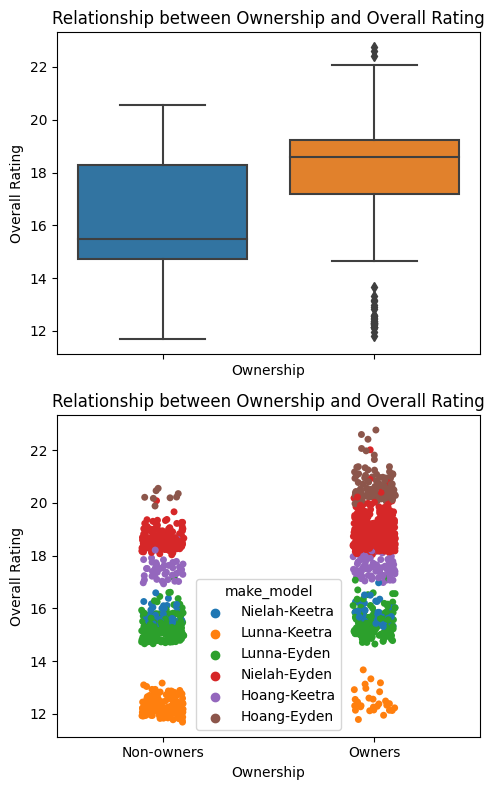

In [ ]:
# Plot relationship between owned and overall_rating
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(5, 8), sharex=True)

# Boxplot
sns.boxplot(x=df['owned'], y=df['overall_rating'], ax=ax0)
ax0.set_xlabel('Ownership')
ax0.set_ylabel('Overall Rating')
ax0.set_title('Relationship between Ownership and Overall Rating')
ax0.set_xticklabels(['Non-owners', 'Owners'])

# Stripplot
sns.stripplot(x=df['owned'], y=df['overall_rating'], hue=df['make_model'], ax=ax1)
ax1.set_xlabel('Ownership')
ax1.set_ylabel('Overall Rating')
ax1.set_title('Relationship between Ownership and Overall Rating')
ax1.set_xticklabels(['Non-owners', 'Owners'])

plt.tight_layout()
plt.show()

Based on the available information, it is evident that there is a stronger association between higher ratings and ownership. The box plot analysis reveals that non-owners tend to have lower ratings, as indicated by the presence of more outliers below the lower whisker and a higher median for owners compared to non-owners.

The findings suggest that owners generally provide more positive ratings compared to non-owners. The higher median and presence of outliers in the upper range for owners further support this conclusion. Conversely, non-owners exhibit a tendency towards lower overall ratings.

Additionally, the strip plot displays the distribution of scores for each model, highlighting that the "Hoang-Eyden" model has received the highest ratings, while the "Lunna-Keetra" model has the lowest ratings.

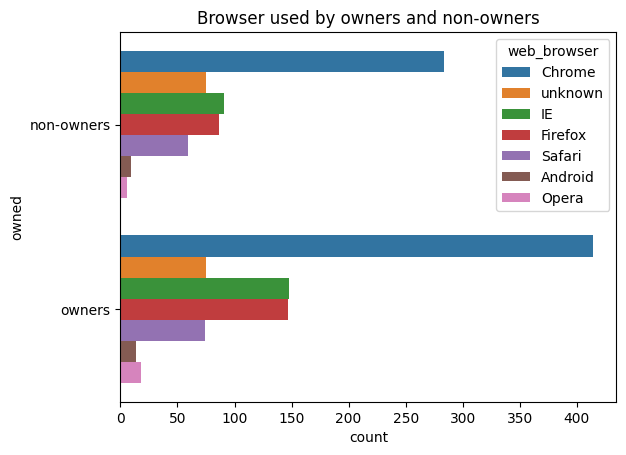

In [ ]:
# Making a count plot to show reviews from owners and not owners
sns.countplot(data= df, y= 'owned', hue= 'web_browser').set_title('Browser used by owners and non-owners')

# Get the axes object
ax = plt.gca()

# Changing names from axes y
changing_names = ['non-owners', 'owners']
ax.set_yticklabels(changing_names)

plt.show()

In [ ]:
# Average rating by model according to each browser
pd.pivot_table(df, index= 'make_model', columns= 'web_browser', values= 'overall_rating', aggfunc='mean')

web_browser,Android,Chrome,Firefox,IE,Opera,Safari,unknown
make_model,,,,,,,
Hoang-Eyden,21.070000,20.592500,20.769500,20.423182,21.623333,20.368571,20.493000
Hoang-Keetra,17.490000,17.602745,17.667273,17.466765,17.274000,17.585000,17.453571
Lunna-Eyden,15.591667,15.339718,15.321167,15.402449,15.531667,15.242973,15.319655
Lunna-Keetra,12.263333,12.312258,12.512500,12.246296,12.240000,12.367143,12.463333
Nielah-Eyden,18.745000,18.846601,18.800370,18.745684,18.503333,18.822373,18.809706
Nielah-Keetra,15.670000,15.811957,15.682857,15.637500,15.690000,15.961250,15.871818


As we can see in the graph and the pivot table that Google Chrome is the most used browser to leave reviews for each of the models, with Hoang-Eyden being the model with the highest average rating for each browser, supporting the previous information.

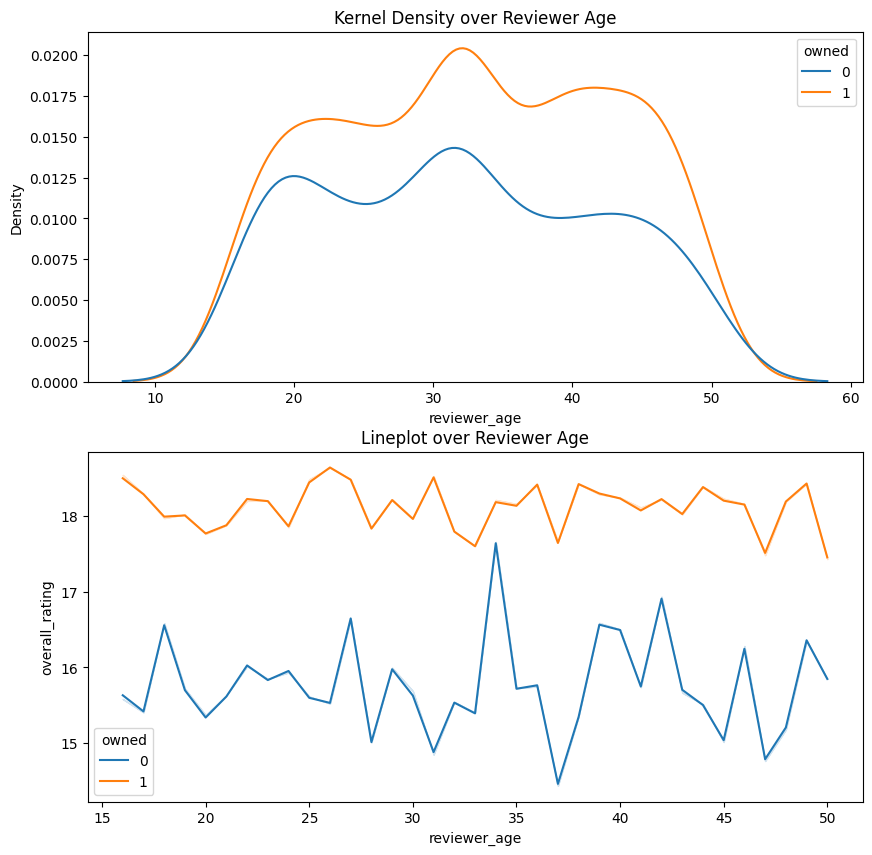

In [ ]:
# Relation of reviews with ages
fig, (ax1, ax2)= plt.subplots(nrows= 2, ncols= 1, figsize= (10, 10))
sns.kdeplot(data= df, x= 'reviewer_age', hue= 'owned', ax= ax1).set_title('Kernel Density over Reviewer Age')
sns.lineplot(data= df, y= 'overall_rating', x= 'reviewer_age', hue= 'owned' , ci= False, ax= ax2).set_title('Lineplot over Reviewer Age')
plt.show()

The graphs indicate that most of the reviews come from owners of all ages and especially the positive ones, in addition to non-owners between the ages of 33 and 35, they also tend to give good reviews.

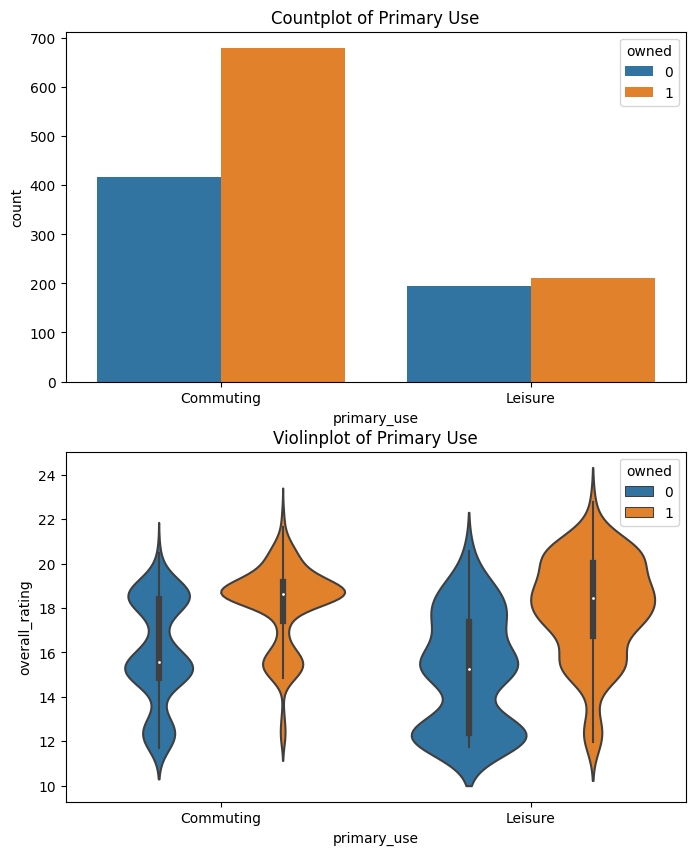

In [ ]:
# Relational plot between primary uses, reviews and owners
fig, (ax1, ax2)= plt.subplots(nrows= 2, ncols= 1, figsize= (8, 10))

# Making a count plot to show reviews from owners and not owners
sns.countplot(hue=df.owned, x=df.primary_use, ax= ax1).set_title('Countplot of Primary Use')

# Distribution of reviews between owners and primary uses
sns.violinplot(data= df, x= 'primary_use', y= 'overall_rating', hue= 'owned', ax= ax2).set_title('Violinplot of Primary Use')

plt.show()

As you can see, most of the reviews come from the owners for both modes of use. Likewise, a large part of the positive reviews come from the owners, although for the Leisure mode of use, there is a tendency for negative reviews.

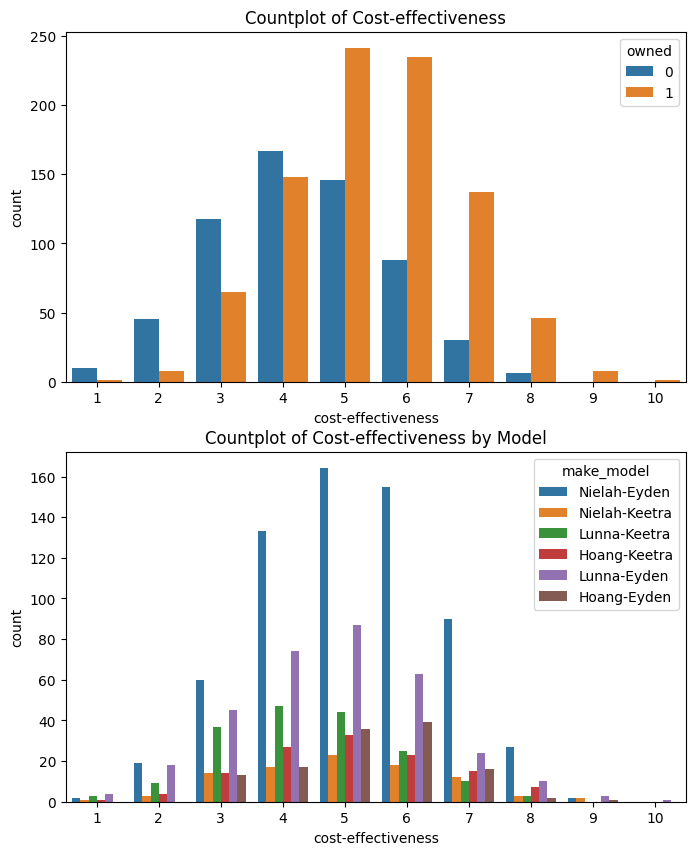

In [ ]:
# Relational plot between cost-effectiveness, make model and owners
fig, (ax1, ax2)= plt.subplots(nrows= 2, ncols= 1, figsize= (8, 10))

# Making a count plot to show cost-effectiveness from owners and not owners
sns.countplot(data=df, x='cost-effectiveness', hue= 'owned', ax= ax1).set_title('Countplot of Cost-effectiveness')

# Making a count plot to show cost-effectiveness for every model
sns.countplot(data= df, x='cost-effectiveness', hue= 'make_model', ax= ax2).set_title('Countplot of Cost-effectiveness by Model')

plt.show()

This graph represents a somewhat balanced distribution for the "Neilah-Eyden" model, although most of the votes show a preference for a less cost-effectiveness model.

The same trend can be observed for the "Lunna-Eyden" model, although this model is the third most commonly used.

The "Hoang-Eyden" model has the highest cost-effectiveness, confirming why it has the highest score among all the models.

## Machine Learning

## This case is about Classification
_**The two categories are "owner" and "non-owner," and the task is to classify each review into one of these categories.**_

In [ ]:
# Applying OneHotEncoding with getdummies from pandas
encoded_data = pd.get_dummies(df[['primary_use', 'web_browser', 'make_model']])

# Merge the encoded dataframe with the original dataframe
data_encoded = pd.concat([df, encoded_data], axis=1)
data_encoded= data_encoded.drop(['primary_use', 'web_browser', 'make_model'], axis=1)
data_encoded['cost-effectiveness']= data_encoded['cost-effectiveness'].astype(int)

In [ ]:
# Shape of dataset
data_encoded.shape

(1500, 20)

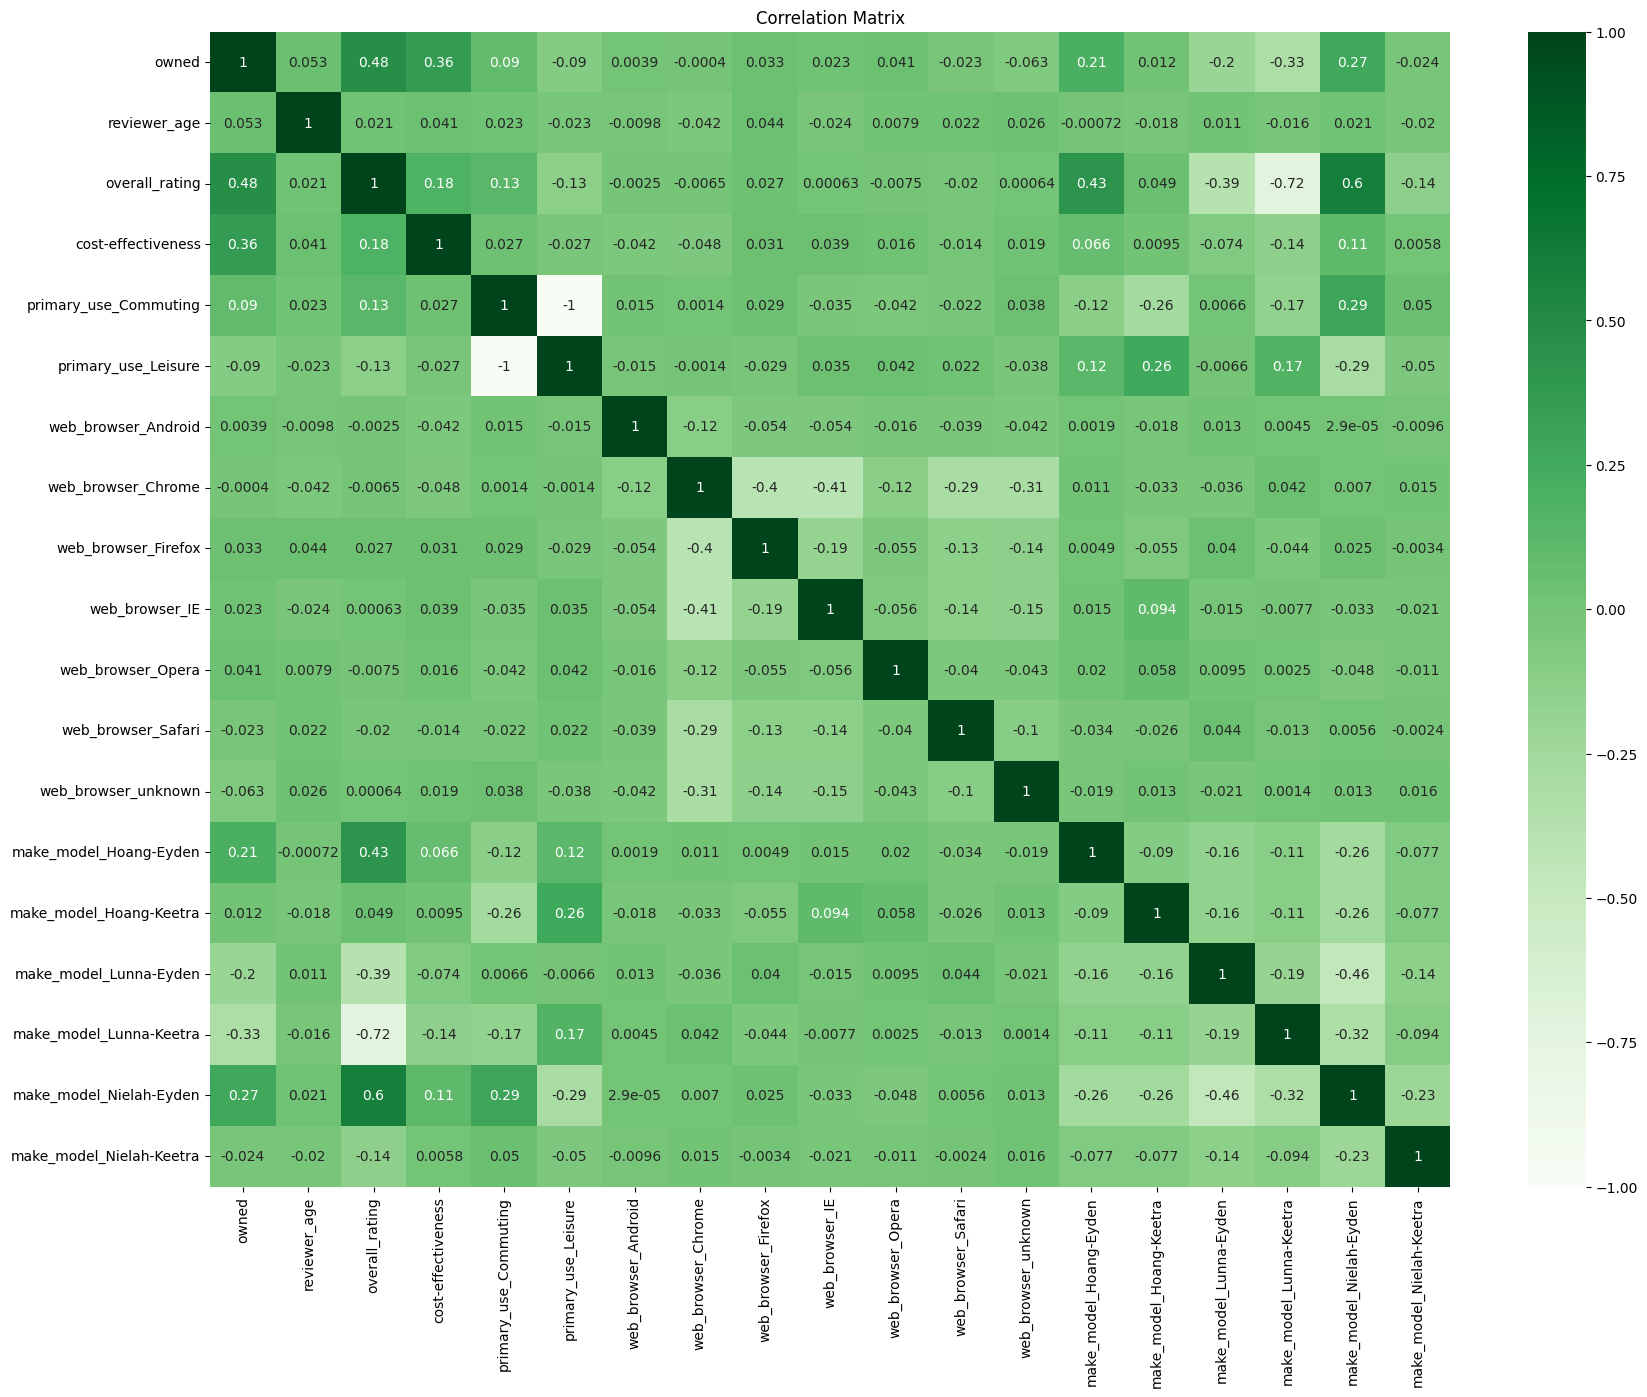

In [ ]:
# Correlation between numeric features and the target
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_encoded.corr(), annot=True, cmap='Greens', linecolor='white', xticklabels=True, yticklabels=True, cbar=True).set_title('Correlation Matrix')
plt.show()

The correlation matrix revealed some interesting relationships among the variables studied. A weak positive correlation was observed between ownership and overall ratings (0.48), suggesting that owners tend to give higher ratings. Additionally, it was found that certain vehicle models, such as "Hoang-Eyden", are more associated with ownership (0.43), while others, like "Lunna-Keetra", have a lower propensity to be owned by the reviewers(-0.33). However, variables such as reviewer age and different web browsers did not show a strong relationship with ownership or overall ratings. These findings provide initial insights.

In [ ]:
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   owned                     1500 non-null   int64  
 1   reviewer_age              1500 non-null   int64  
 2   overall_rating            1500 non-null   float64
 3   month_of_review           1500 non-null   object 
 4   cost-effectiveness        1500 non-null   int64  
 5   primary_use_Commuting     1500 non-null   uint8  
 6   primary_use_Leisure       1500 non-null   uint8  
 7   web_browser_Android       1500 non-null   uint8  
 8   web_browser_Chrome        1500 non-null   uint8  
 9   web_browser_Firefox       1500 non-null   uint8  
 10  web_browser_IE            1500 non-null   uint8  
 11  web_browser_Opera         1500 non-null   uint8  
 12  web_browser_Safari        1500 non-null   uint8  
 13  web_browser_unknown       1500 non-null   uint8  
 14  make_mod

In [ ]:
# Check if the target values are balanced
df.owned.value_counts()

1    890
0    610
Name: owned, dtype: int64

**Due to the class imbalance, it is advisable to take into account the scores of precision, recall and F1-score.**

In [ ]:
# Split the data in features (X) and target (y)
X= data_encoded.drop(['owned', 'month_of_review'], axis= 1).values
y= data_encoded['owned'].values.reshape(-1,1)

In [ ]:
# Applying train test split to the features and target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 10)

Accuracy with default params=  0.7533333333333333
              precision    recall  f1-score   support

           0       0.71      0.65      0.67       178
           1       0.78      0.82      0.80       272

    accuracy                           0.75       450
   macro avg       0.74      0.73      0.74       450
weighted avg       0.75      0.75      0.75       450



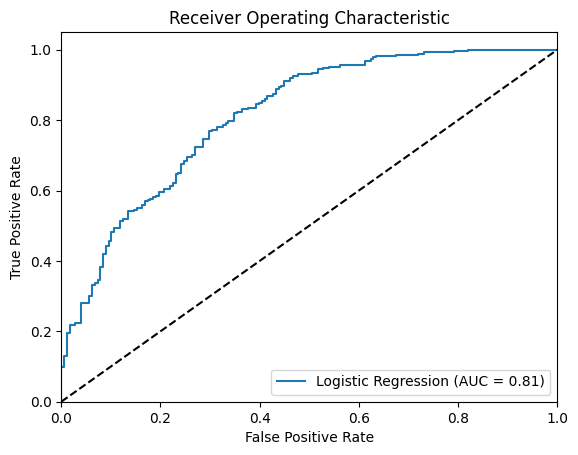

In [ ]:
# Instantiating a LogisticRegression Model
logreg= LogisticRegression()

# Fit model
logreg.fit(X_train, y_train)

# Predict test set labels
y_pred_lr= logreg.predict(X_test)
accuracy_lr= accuracy_score(y_test, y_pred_lr)

# Computing metrics
report = classification_report(y_test, y_pred_lr)

# Compute the score
print('Accuracy with default params= ', accuracy_lr)
print(report)

# Computing probability of positive class for every model
probas = logreg.predict_proba(X_test)[:, 1]

# Computing ROC and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Best params:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1}
Best score:  0.7504761904761905
              precision    recall  f1-score   support

           0       0.64      0.70      0.66       178
           1       0.79      0.74      0.76       272

    accuracy                           0.72       450
   macro avg       0.71      0.72      0.71       450
weighted avg       0.73      0.72      0.72       450



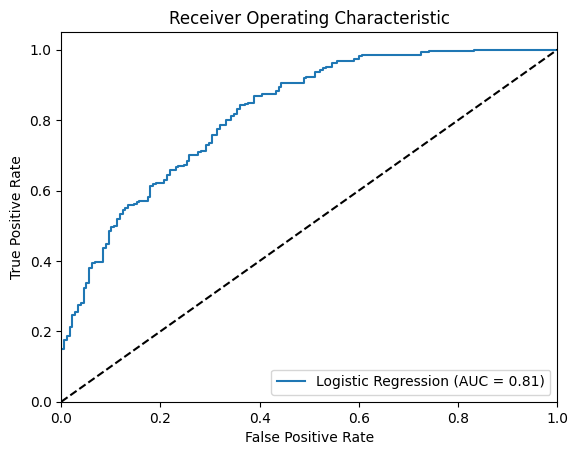

In [ ]:
# Trying LogisticRegression adjusting some params
params = {'solver': ['liblinear', 'newton-cg'], "penalty": ["l1", "l2"],"tol": [0.001, 0.01, 0.1, 1], "C": np.linspace(0.1, 1.0, 4), "class_weight": ["balanced",{0:0.8, 1:0.2}]}

# Instantiate GridSearchCV
lr_cv= GridSearchCV(logreg, params, cv=10)

# Fit lr_cv
lr_cv.fit(X_train, y_train)

# Predict test set labels
y_pred_lr1= lr_cv.predict(X_test)

# Computing metrics
report1 = classification_report(y_test, y_pred_lr1)

# Print best_params, best_score and metrics
print('Best params: ', lr_cv.best_params_)
print('Best score: ', lr_cv.best_score_)
print(report1)

# Computing probability of positive class for every model
probas1 = lr_cv.predict_proba(X_test)[:, 1]

# Computing ROC and AUC-ROC
fpr1, tpr1, _ = roc_curve(y_test, probas1)
roc_auc1 = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**After performing two tests with the logistic regression model, one using the default hyperparameters and another with 10 iterations using GridSearchCV, it was determined that the default parameters should be kept. This decision was made because the default parameters showed slightly better performance compared to the tuned parameters obtained through GridSearchCV. Additionally, both sets of parameters yielded the same AUC score.**

We will proceed to evaluate the performance of each available classification model without hyperparameter tuning. Based on their performance on the data, we will select the top two models with the highest performance.

In [ ]:
# Function to evalute models
def evaluate_models(X_train, X_test, y_train, y_test):
    """Function to evaluate each model and create a behavior graph through the ROC curve to assess the model's ability to predict values."""
    models = {
        'Support Vector Machine': SVC(probability=True),
        'KNeighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'XGBoost': xgb.XGBClassifier(objective= 'binary:logistic')
}
    for model_name, model in models.items():
        # Training models
        model.fit(X_train, y_train)

        # Making predictions over test set
        y_pred = model.predict(X_test)

        # Computing metrics
        accuracy = model.score(X_test, y_test)
        report = classification_report(y_test, y_pred)

        # Print accuracy of the models
        print(f"Training and evaluating {model_name}...")
        print("Accuracy:", accuracy)
        print(report)

        # Computing probability of positive class for every model
        probas = model.predict_proba(X_test)[:, 1]

        # Computing ROC and AUC-ROC
        fpr, tpr, _ = roc_curve(y_test, probas)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

Training and evaluating Support Vector Machine...
Accuracy: 0.7511111111111111
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       178
           1       0.76      0.86      0.81       272

    accuracy                           0.75       450
   macro avg       0.75      0.72      0.73       450
weighted avg       0.75      0.75      0.74       450



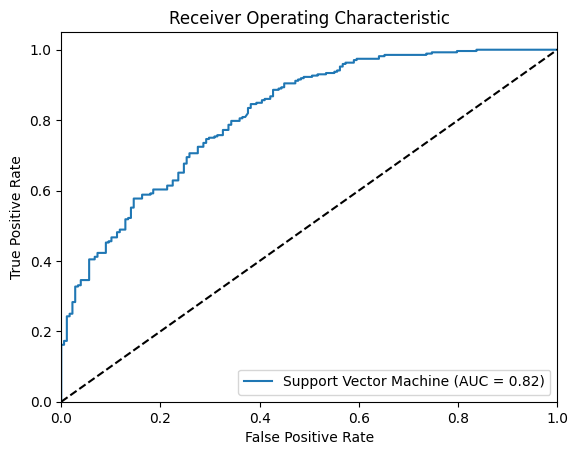

Training and evaluating KNeighbors...
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       178
           1       0.75      0.81      0.78       272

    accuracy                           0.72       450
   macro avg       0.71      0.70      0.70       450
weighted avg       0.72      0.72      0.72       450



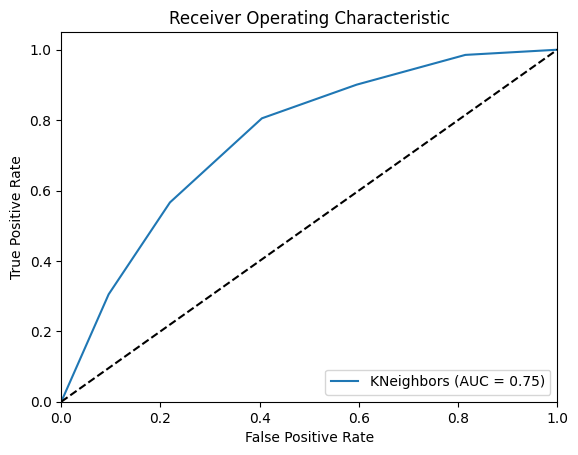

Training and evaluating Decision Tree...
Accuracy: 0.6711111111111111
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       178
           1       0.72      0.75      0.73       272

    accuracy                           0.67       450
   macro avg       0.65      0.65      0.65       450
weighted avg       0.67      0.67      0.67       450



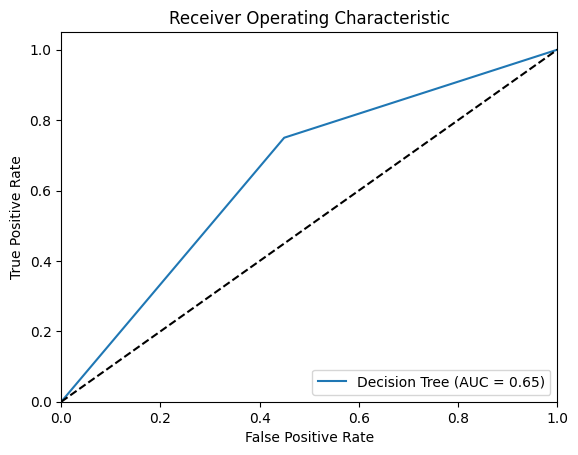

Training and evaluating Random Forest...
Accuracy: 0.7244444444444444
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       178
           1       0.76      0.79      0.78       272

    accuracy                           0.72       450
   macro avg       0.71      0.71      0.71       450
weighted avg       0.72      0.72      0.72       450



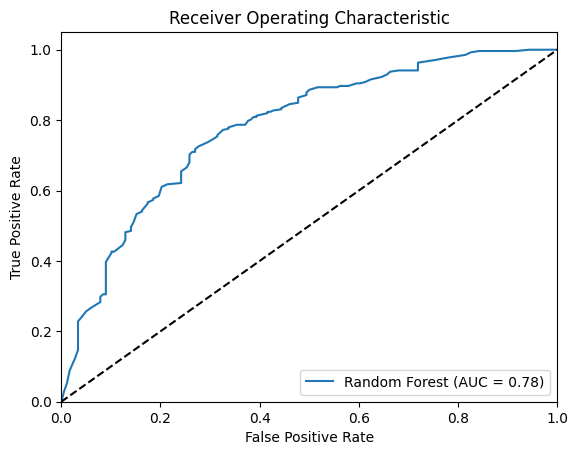

Training and evaluating Gradient Boosting...
Accuracy: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       178
           1       0.79      0.79      0.79       272

    accuracy                           0.75       450
   macro avg       0.74      0.74      0.74       450
weighted avg       0.75      0.75      0.75       450



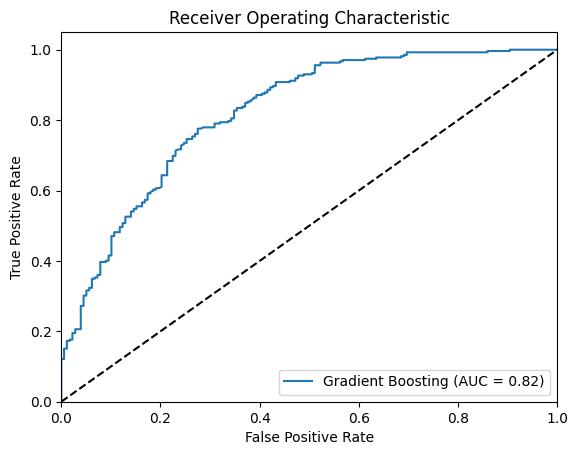

Training and evaluating XGBoost...
Accuracy: 0.7111111111111111
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       178
           1       0.76      0.77      0.76       272

    accuracy                           0.71       450
   macro avg       0.70      0.70      0.70       450
weighted avg       0.71      0.71      0.71       450



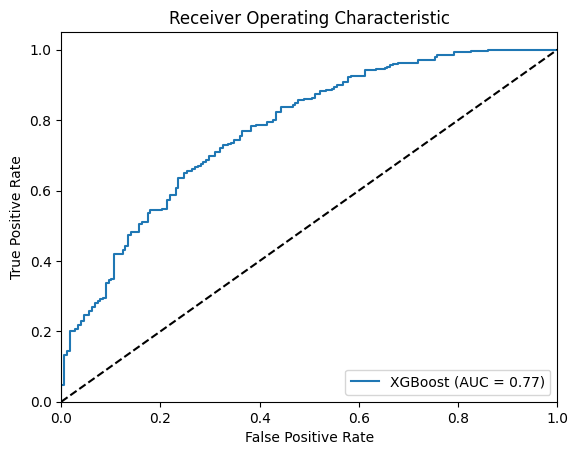

In [ ]:
evaluate_models(X_train, X_test, y_train, y_test)

**Due to the very similar performance between Gradient Boosting and SVM, a final cross-validation test will be conducted to determine which other model should be chosen for the final calculations of this dataset.**

In [ ]:
# Instantiate models
svm_model = SVC()
gb_model = GradientBoostingClassifier()

# Perform cross-validation for two models
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Computing accuracy for two models
svm_mean_accuracy = svm_scores.mean()
gb_mean_accuracy = gb_scores.mean()

# Print the results
print("Support Vector Machine (SVM) - Average Accuracy: {:.4f}".format(svm_mean_accuracy))
print("Gradient Boosting - Average Accuracy: {:.4f}".format(gb_mean_accuracy))

Support Vector Machine (SVM) - Average Accuracy: 0.7457
Gradient Boosting - Average Accuracy: 0.7438


The accuracy of SVM is slightly higher than that of Gradient Boosting, suggesting that both models will yield comparable results.

Upon careful analysis, all models exhibit similar behavior. However, Support Vector Machine stands out with an accuracy very close to that of Logistic Regression, but with a slightly higher AUC by one point.

Therefore, the two models chosen for this analysis are:

1. Logistic Regression
2. SVM (Support Vector Machine)

**LogisticRegression** is a fully used model in binary classification. It relies on the use of a logistic function to model the probability of belonging to a class. This model is particularly suitable when there is a suspicion that the relationships between the predictor variables and the target variable are linear. Additionally, LogisticRegression is a relatively simple and fast model to train, making it more efficient for classifications.

**The Support Vector Machine (SVM)** algorithm is a powerful classification model that uses hyperplanes to separate data points in a high-dimensional space. It is known for its ability to handle both linear and non-linear relationships in the data. In this particular dataset, SVM without hyperparameter tuning demonstrated superior performance in terms of accuracy and AUC compared to other models. This highlights the efficiency of SVM in capturing complex interactions between predictor variables and its effectiveness in classifying the data accurately.

In [ ]:
# Instantiate SVM
svm = SVC()

# Looking for the best hyperparameters to compete against LogisticRegression
parameters={'C':[0.1,1,10],'gamma':[0.00001,0.0001,0.001,0.01,0.1], 'kernel':['rbf', 'linear']}
searcher=GridSearchCV(svm,parameters)
searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
print("Best CV params",searcher.best_params_)
print("Best CV accuracy",searcher.best_score_)

Best CV params {'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}
Best CV accuracy 0.7561904761904762


In [ ]:
# Instantiate model
logistic_regression = LogisticRegression()
svm= SVC(C= 1, gamma= 0.00001, kernel= 'linear')

# Model train
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Making predictions
logistic_regression_predictions = logistic_regression.predict(X_test)
svm_predictions = svm.predict(X_test)

# Accuracy score
accuracy_lg= accuracy_score(y_test, logistic_regression_predictions)
accuracy_svm= accuracy_score(y_test, svm_predictions)

# Print classificacion_report
print("Logistic Regression Report:")
print("Logistic Regression Score: ", accuracy_lg)
print(classification_report(y_test, logistic_regression_predictions))
print("SVM Report:")
print("SVM Score: ", accuracy_svm)
print(classification_report(y_test, svm_predictions))

Logistic Regression Report:
Logistic Regression Score:  0.7533333333333333
              precision    recall  f1-score   support

           0       0.71      0.65      0.67       178
           1       0.78      0.82      0.80       272

    accuracy                           0.75       450
   macro avg       0.74      0.73      0.74       450
weighted avg       0.75      0.75      0.75       450

SVM Report:
SVM Score:  0.7533333333333333
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       178
           1       0.78      0.82      0.80       272

    accuracy                           0.75       450
   macro avg       0.74      0.74      0.74       450
weighted avg       0.75      0.75      0.75       450



The results for both Logistic Regression and Support Vector Machine (SVM) models are quite similar. The accuracy score for both models is approximately 0.75, indicating that they both perform similarly in terms of overall classification accuracy.

Looking at the precision, recall, and f1-score for both classes (0 and 1), we can see that both models achieve comparable results. The precision and recall values are relatively high for both classes, indicating that the models are able to correctly classify instances of both classes with good accuracy. The f1-score, which combines precision and recall, also shows a similar performance for both models.

In terms of the support or the number of instances in each class, both models have a similar distribution, with class 0 having around 178 instances and class 1 having around 272 instances.

Overall, based on these results, it can be concluded that both Logistic Regression and SVM models perform similarly in terms of classification accuracy and other evaluation metrics for this particular dataset

### Recommendations

-Take into account the functionalities and features of the "Nielah-Eyden" and "Hoang-Eyden" models, as they are the most used and highly rated models, respectively. This can be considered for future models or even implemented in models with less usage and lower ratings, such as the "Lunna" models.

-Most of the ratings come directly from the owners. It is suggested to provide incentives for non-owners to fill out the surveys, as this can potentially help increase the ratings, as generally the lower ratings come from non-owners.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam